In [1]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# tack on the plant construction year

In [5]:
usw_df = pd.read_csv('data/uswtdbCSV/uswtdb_v3_0_1_20200514.csv')
#calc mean construction year
data_df['p_year'] = [usw_df.set_index('eia_id').loc[ei,'p_year'].mean() for ei in data_df['eia_id']]

# moving on

In [2]:
data_arr = np.concatenate([
    np.load('data/all-wind-1/features' + frange + '.npy')
    for frange in '0:200,200:400,400:494,494:700,700:900,900:993'.split(',')],axis=0)

In [3]:
data_df = pd.read_pickle('data/all-power-1.pkl').iloc[:len(data_arr)]
data_df.columns = [' '.join(col).strip() for col in data_df.columns.values]
data_df = data_df.reset_index().drop('index',axis=1)
data_df

eia_id  t_cap <lambda>  p_cap max  p_cap min    mean MW   latitude  \
0       508           7.500       4.50       3.00   3.719400  38.033327   
1       692           6.270       3.30       1.20   1.956919  41.835278   
2       944           3.000       3.00       3.00   0.453438  41.451494   
3      1172           1.500       1.50       1.50   0.314396  43.279722   
4      1998           1.200       1.25       1.25   0.262241  43.940500   
..      ...             ...        ...        ...        ...        ...   
988   62227          30.240      30.24      30.24   9.313927  33.578240   
989   62269         100.750      66.63      34.13  36.363242  44.104377   
990   62291          44.600      44.60      44.60   8.145776  44.857694   
991   62356         181.300     183.75     183.75  42.542580  34.072251   
992   62488         199.275     199.28     199.28  36.402968  37.978800   

      longitude State  t_cap_factor  p_cap_factor  
0   -102.537915    CO      0.495920      0.826533  
1   -106.242778    WY      0.312108      0.593006  
2    -90.148547    IL      0.151146      0.151146  
3    -92.810556    IA      0.209597      0.209597  
4    -94.943400    MN      0.218535      0.209793  
..          ...   ...           ...           ...  
988  -99.192100    TX      0.308000      0.308000  
989  -96.126733    MN      0.360925      0.545749  
990  -95.568888    MN      0.182641      0.182641  
991  -99.264676    TX      0.234653      0.231524  
992  -95.224400    KS      0.182677      0.182672  

[993 rows x 10 columns]

In [4]:
data_df = pd.read_pickle('data/all-power-1.pkl').iloc[:len(data_arr)]
data_df.columns = [' '.join(col).strip() for col in data_df.columns.values]
data_df = data_df.reset_index().drop('index',axis=1)
data_df = pd.concat([
    data_df,
    pd.DataFrame(data_arr,columns=['elevation','mean_wind_speed', 'pow_curve','temperature'])
],axis=1)

data_df = data_df[(data_df['t_cap_factor'] < 1) & (data_df['p_cap_factor'] < 1)]
data_df = data_df[data_df['p_cap max'] > 10]
data_df

eia_id  t_cap <lambda>  p_cap max  p_cap min    mean MW   latitude  \
9      7526         102.180      63.00       4.62  33.933730  38.116415   
12     7886          11.220      11.22      11.22   2.221594  44.669400   
13     7901           2.160     129.00       1.32   0.308105  43.657500   
14     7936          95.900      48.10      15.60  22.852303  46.095800   
18    10005          17.010      17.03      17.03   2.688778  37.047800   
..      ...             ...        ...        ...        ...        ...   
988   62227          30.240      30.24      30.24   9.313927  33.578240   
989   62269         100.750      66.63      34.13  36.363242  44.104377   
990   62291          44.600      44.60      44.60   8.145776  44.857694   
991   62356         181.300     183.75     183.75  42.542580  34.072251   
992   62488         199.275     199.28     199.28  36.402968  37.978800   

      longitude State  t_cap_factor  p_cap_factor   elevation  \
9   -121.769031    CA      0.332098      0.538631   30.116516   
12   -87.633300    WI      0.198003      0.198003  243.814377   
13   -88.438100    WI      0.142641      0.002388         NaN   
14  -119.096400    WA      0.238293      0.475100  460.862762   
18  -121.170800    CA      0.158070      0.157885  415.057281   
..          ...   ...           ...           ...         ...   
988  -99.192100    TX      0.308000      0.308000  421.615112   
989  -96.126733    MN      0.360925      0.545749  573.309998   
990  -95.568888    MN      0.182641      0.182641  311.521851   
991  -99.264676    TX      0.234653      0.231524  381.274414   
992  -95.224400    KS      0.182677      0.182672  331.254974   

     mean_wind_speed  pow_curve  temperature  
9           7.554932   0.515721   288.768433  
12          7.907026   0.542483   279.278015  
13          7.801280   0.534336   279.501617  
14          7.061708   0.418056   284.512421  
18          6.658729   0.431119   288.333954  
..               ...        ...          ...  
988         8.008331   0.561263   289.803406  
989         8.481019   0.593805   278.792175  
990         7.385202   0.502148   279.262085  
991         7.530462   0.514403   289.658295  
992         7.912496   0.536956   285.674744  

[812 rows x 14 columns]

In [6]:
clean_data_df = data_df[['elevation','mean_wind_speed', 'pow_curve','temperature','t_cap_factor','p_cap_factor','p_year']].dropna()

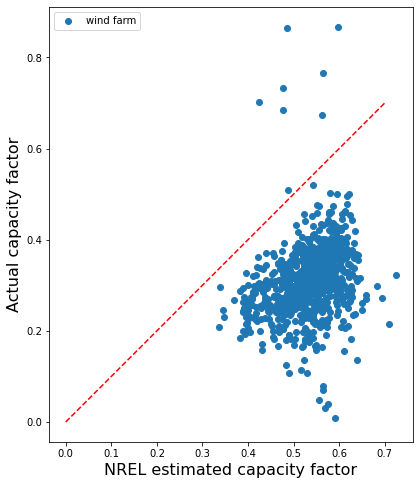

In [27]:
plt.subplots(figsize=(8,8))
plt.scatter(clean_data_df['pow_curve'],clean_data_df['t_cap_factor'],label='wind farm')
plt.ylabel('Actual capacity factor',fontsize=16)
plt.xlabel('NREL estimated capacity factor',fontsize=16)
plt.plot([0,0.7],[0,0.7],linestyle='--',c='red')
plt.legend()
plt.gca().set_aspect(aspect=1)
plt.savefig('/Users/kook/insight/figs/nrel-vs-real-capacity.png',bbox_inches='tight')

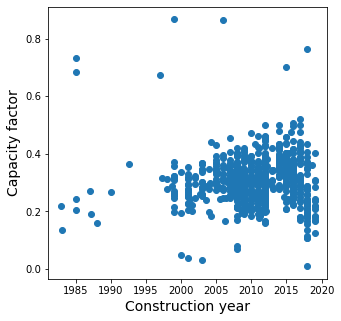

In [87]:
plt.figure(figsize=(5,5))
plt.scatter(clean_data_df['p_year'],clean_data_df['t_cap_factor'])
plt.xlabel('Construction year',fontsize=14)
plt.ylabel('Capacity factor',fontsize=14)
plt.savefig('figs/capacity-vs-year.png',bbox_inches='tight')

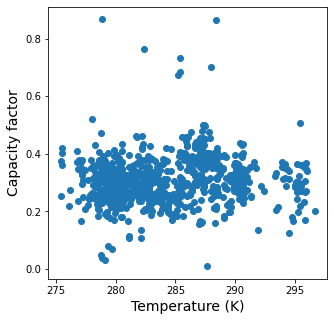

In [89]:
plt.figure(figsize=(5,5))
plt.scatter(clean_data_df['temperature'],clean_data_df['t_cap_factor'])
plt.xlabel('Temperature (K)',fontsize=14)
plt.ylabel('Capacity factor',fontsize=14)
plt.savefig('figs/capacity-vs-temp.png',bbox_inches='tight')

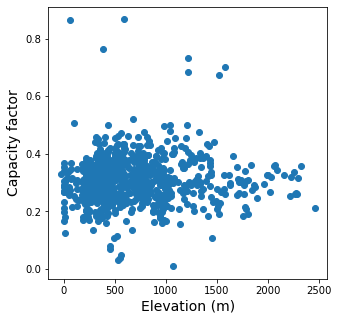

In [90]:
plt.figure(figsize=(5,5))
plt.scatter(clean_data_df['elevation'],clean_data_df['t_cap_factor'])
plt.xlabel('Elevation (m)',fontsize=14)
plt.ylabel('Capacity factor',fontsize=14)
plt.savefig('figs/capacity-vs-elevation.png',bbox_inches='tight')

In [78]:
from scipy.interpolate import interp1d
power_curve_df = pd.read_csv('data/power-curves.csv')
power_curve_fn = interp1d(power_curve_df['Speed'],power_curve_df['IEC - 3'],bounds_error=False,fill_value=0)

In [83]:
plt.figure(figsize=(3,2))
(lambda x: plt.plot(x,power_curve_fn(x)))(np.linspace(0,25,100))
plt.xlabel('wind speed (m/s)')
plt.ylabel('capacity factor')
plt.savefig('figs/tiny-power-curve.png',bbox_inches='tight')

In [154]:
from pandas_profiling import ProfileReport
ProfileReport(clean_data_df[['elevation','mean_wind_speed', 'pow_curve','temperature','t_cap_factor','p_cap_factor','p_year']],title='all-wind-farm-report')

# clustering

In [138]:
data = clean_data_df
features = ['elevation','mean_wind_speed', 'pow_curve','temperature','p_year']
# features = ['elevation','mean_wind_speed','mean_cubed_wind_speed',
#             'temperature','pressure','precipitation','mo_length','humidity','wind_dir','DNI','pow_curve']
# X = pd.concat([
#     df[['elevation','latitude','longitude']],
#     pd.DataFrame(test_feature/np.max(test_feature))
# ],axis=1)
X = pd.concat([
    data[features],
    #pd.DataFrame(test_feature/np.max(test_feature))
],axis=1)
#y = data['p_cap_factor']
#y = df['per_turb_power']

In [141]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(X)
y_pred = model.predict(X)

In [142]:
y_pred
[np.mean(clean_data_df['p_cap_factor'][y_pred == label]) for label in range(8)]

[0.28535108585623437,
 0.3306176971118997,
 0.2913900751291931,
 0.3012580639745448,
 nan,
 nan,
 nan,
 nan]

# regression

In [200]:
data = clean_data_df
features = ['elevation','mean_wind_speed', 'pow_curve','temperature','p_year']
# features = ['elevation','mean_wind_speed','mean_cubed_wind_speed',
#             'temperature','pressure','precipitation','mo_length','humidity','wind_dir','DNI','pow_curve']
# X = pd.concat([
#     df[['elevation','latitude','longitude']],
#     pd.DataFrame(test_feature/np.max(test_feature))
# ],axis=1)
X = pd.concat([
    data[features],
    #pd.DataFrame(test_feature/np.max(test_feature))
],axis=1)
y = data['t_cap_factor']
#y = df['per_turb_power']

In [201]:
np.std(y)

0.08282814163938403

In [202]:
sns.distplot(y,rug=True)

In [196]:
from sklearn.metrics import explained_variance_score, r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import normalize
from sklearn.inspection import permutation_importance

#test a model and print/plot testing results
def test_model(model,X,y, random_state = 0, score = 'explained_variance'):
    score_funs = {
    'explained_variance' : explained_variance_score,
    'r2' : r2_score, 'neg_root_mean_squared_error' : lambda *args: mean_squared_error(*args,squared=False)
    }
    score_fun = score_funs[score]
    
    #split the data into training / testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= random_state)
    #X_train = normalize(X_train)
    #X_test = normalize(X_test)
    #cross validate with f1 scores
    scores = cross_val_score(model,X_train,y_train,scoring = score)

    print('cross validation scores:', scores)
    print('mean,std',np.mean(scores),np.std(scores))
    #fit data and compare scores for training and testing data
    model = model.fit(X_train, y_train)
    
    print("training data")
    y_pred = model.predict(X_train)
    print(score_fun(y_train, y_pred))
    
    print("testing data")
    y_pred = model.predict(X_test)
    print(score_fun(y_test, y_pred))
    
    #plot confusion matrix and permutation importances
#     fig, (cm_ax,pi_ax) = plt.subplots(1,2,figsize=(18,5))

#     plot_confusion_matrix(model,X_test,y_test,ax=cm_ax,normalize='true')
#     cm_ax.set_title('confusion matrix')
    
    result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                random_state=random_state, n_jobs=1)
    sorted_idx = result.importances_mean.argsort()
    
    fig, ax = plt.subplots(figsize=(18,5))
    ax.boxplot(result.importances[sorted_idx].T,
               vert=False, labels=X_test.columns[sorted_idx])
    ax.set_title("Permutation Importances (test set)")
    
    fig.tight_layout()
    plt.show()
    
    return model #returns fitted estimator


In [203]:
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split

#model = RandomForestRegressor(n_estimators= 400)
model = AdaBoostRegressor()
model = test_model(model,X,y,score = 'neg_root_mean_squared_error',random_state=0)

cross validation scores: [-0.06697352 -0.05943778 -0.08500572 -0.07600657 -0.07226095]
mean,std -0.07193690753131554 0.008582825557371715
training data
0.05799604809011173
testing data
0.08664140678982617


## learning curve

In [182]:
"""
========================
Plotting Learning Curves
========================
In the first column, first row the learning curve of a naive Bayes classifier
is shown for the digits dataset. Note that the training score and the
cross-validation score are both not very good at the end. However, the shape
of the curve can be found in more complex datasets very often: the training
score is very high at the beginning and decreases and the cross-validation
score is very low at the beginning and increases. In the second column, first
row we see the learning curve of an SVM with RBF kernel. We can see clearly
that the training score is still around the maximum and the validation score
could be increased with more training samples. The plots in the second row
show the times required by the models to train with various sizes of training
dataset. The plots in the third row show how much time was required to train
the models for each training sizes.
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5),scoring='r2'):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel(scoring)

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel(scoring)
    axes[2].set_title("Performance of the model")

    return plt



Plotting Learning Curves
In the first column, first row the learning curve of a naive Bayes classifier
is shown for the digits dataset. Note that the training score and the
cross-validation score are both not very good at the end. However, the shape
of the curve can be found in more complex datasets very often: the training
score is very high at the beginning and decreases and the cross-validation
score is very low at the beginning and increases. In the second column, first
row we see the learning curve of an SVM with RBF kernel. We can see clearly
that the training score is still around the maximum and the validation score
could be increased with more training samples. The plots in the second row
show the times required by the models to train with various sizes of training
dataset. The plots in the third row show how much time was required to train
the models for each training sizes.



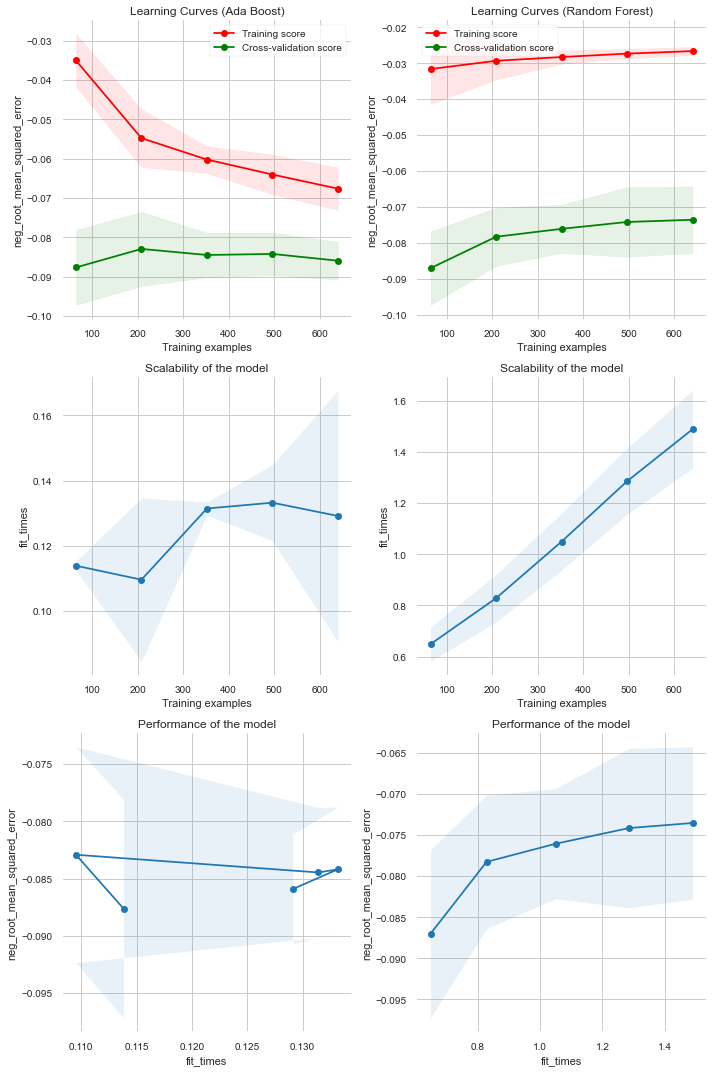

In [204]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Ada Boost)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = AdaBoostRegressor(n_estimators=100)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0],
                    cv=cv, n_jobs=4,scoring = 'neg_root_mean_squared_error')

title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = RandomForestRegressor(n_estimators=500)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1],
                    cv=cv, n_jobs=4,scoring = 'neg_root_mean_squared_error')

plt.tight_layout()
plt.show()

# classification

In [20]:
from sklearn.metrics import f1_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import normalize
from sklearn.inspection import permutation_importance, plot_partial_dependence
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import classification_report

def test_classifier(model,X,y, random_state = 0, score = 'precision',plot_partial=False):
    score_funs = {
    'f1' : f1_score, 'precision' : precision_score
    }
    score_fun = score_funs[score]
    
    #split the data into training / testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify = y, random_state= random_state)
    #X_train = normalize(X_train)
    #X_test = normalize(X_test)
    #cross validate with f1 scores
    scores = cross_val_score(model,X,y,scoring = score,cv=3)

    print('cross validation scores:', scores)
    print('mean,std',np.mean(scores),np.std(scores))
    #fit data and compare scores for training and testing data
    model = model.fit(X_train, y_train)
    
    print("training data")
    y_pred = model.predict(X_train)
    print(score_fun(y_train, y_pred))
    print(classification_report(y_train,y_pred))
    print("testing data")
    y_pred = model.predict(X_test)
    print(score_fun(y_test, y_pred))
    print(classification_report(y_test,y_pred))
    #plot confusion matrix and permutation importances
    fig, axes = plt.subplots(1,3,figsize=(18,5))
    (cm_ax,roc_ax,pi_ax) = axes.ravel()
    plot_confusion_matrix(model,X_test,y_test,ax=cm_ax)
    cm_ax.set_title('confusion matrix')
    #plot_roc_curve(model,X_test,y_test,ax=roc_ax)
    #roc_ax.plot([0,1],[0,1],c='red')
    plot_precision_recall_curve(model,X_test,y_test,ax=roc_ax)
    
    
    result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                random_state=random_state, n_jobs=1)
    sorted_idx = result.importances_mean.argsort()

    pi_ax.boxplot(result.importances[sorted_idx].T,
               vert=False, labels=X_test.columns[sorted_idx])
    pi_ax.set_title("Permutation Importances (test set)")
    fig.tight_layout()
    plt.show()
    
    if plot_partial:
        plot_partial_dependence(model,X,np.arange(X.shape[-1]))
    
    
    return model #returns fitted estimator

427 / 801
0.533083645443196
y mean 0.533083645443196
y std 0.4989042717838652


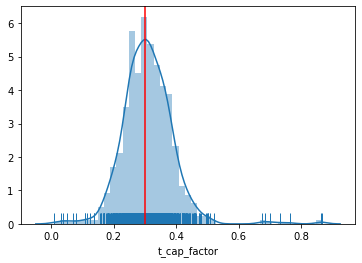

In [40]:
from sklearn.preprocessing import Binarizer
#data = df_bigfarms
data = clean_data_df
features = ['elevation','mean_wind_speed', 'pow_curve','temperature','p_year']
#features = ['pow_curve','p_year']
# X = pd.concat([
#     df[['elevation','latitude','longitude']],
#     pd.DataFrame(test_feature/np.max(test_feature))
# ],axis=1)
X = pd.concat([
    #pd.Series(np.random.randn(len(y)).reshape(-1,1))
    data[features],
    #pd.DataFrame(test_feature[is_bigfarm,:])
],axis=1)
y_continuous = data['t_cap_factor']
y = y_continuous.to_numpy().reshape(-1,1)
binarizer = Binarizer(threshold=0.3).fit(y)
y = binarizer.transform(y).reshape(-1)
print(np.count_nonzero(y),'/',len(y))
print(np.count_nonzero(y)/len(y))
fig,ax = plt.subplots()
sns.distplot(y_continuous,rug=True,ax=ax,norm_hist=False)
ax.axvline(0.3,c='red')
print('y mean',np.mean(y))
print('y std',np.std(y))

In [71]:
bins = np.linspace(0,0.8,41)
bins

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 ])

In [77]:
bins = np.linspace(0,0.8,41)
plt.hist(y_continuous[y_continuous < 0.3],color='red',bins=bins)
plt.hist(y_continuous[y_continuous > 0.3],bins=bins);
plt.xlabel('Capacity Factor',fontsize=14)
plt.ylabel('# Wind Farms',fontsize=14)
#plt.show()
plt.savefig('figs/capacity-class-hist.png',bbox_inches='tight')
#plt.hist(y_continuous,bins=bins)

cross validation scores: [0.75757576 0.66315789 0.64141414]
mean,std 0.6873825979089138 0.05042160548912138
training data
0.8240343347639485
              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82       187
         1.0       0.82      0.90      0.86       213

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400

testing data
0.6858407079646017
              precision    recall  f1-score   support

         0.0       0.66      0.62      0.64       187
         1.0       0.69      0.72      0.70       214

    accuracy                           0.68       401
   macro avg       0.67      0.67      0.67       401
weighted avg       0.68      0.68      0.67       401



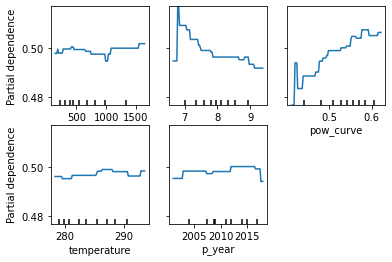

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import Lasso, BayesianRidge
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
#model = RandomForestClassifier(n_estimators=2000)
#model = SVC()
model = AdaBoostClassifier(n_estimators=100)
model = test_classifier(model,X,y,random_state=3,plot_partial=True)

In [23]:
# import pickle as pkl
# with open('models/capacity-class-model-v3.pkl','wb') as f:
#     pkl.dump(model,f,protocol = 3)

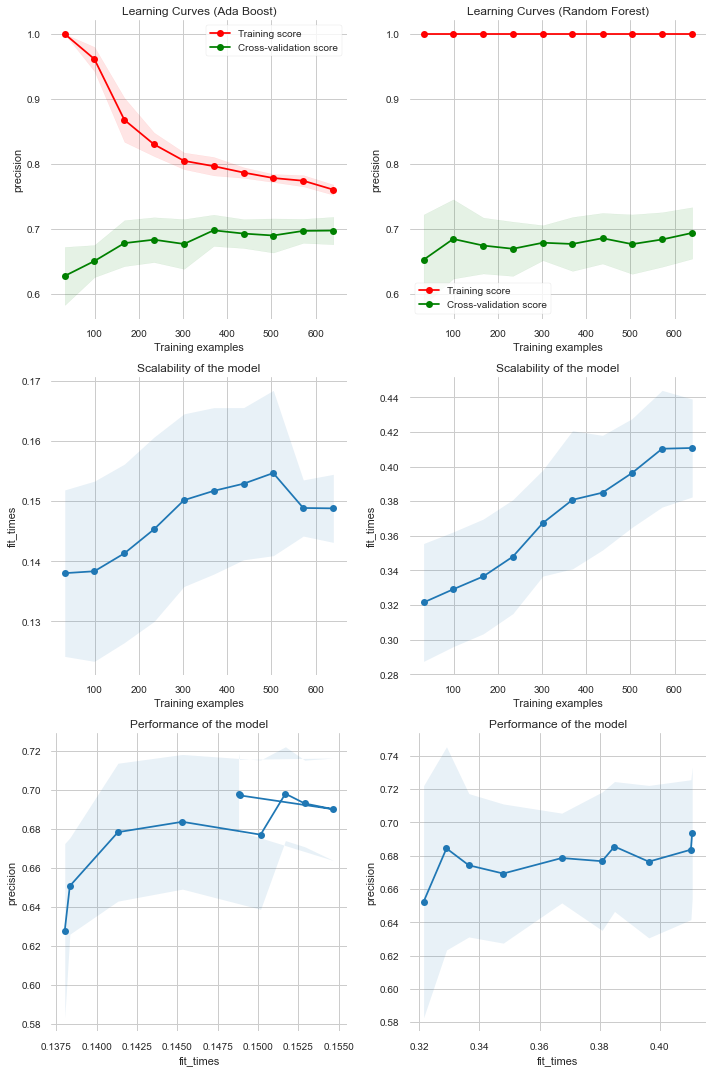

In [247]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Ada Boost)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=8)
train_sizes = train_sizes=np.linspace(.05, 1.0, 10)
estimator = AdaBoostClassifier(n_estimators=100)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0],
                    cv=cv, n_jobs=4,scoring='precision',train_sizes=train_sizes)

title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=8)

estimator = RandomForestClassifier(n_estimators = 200)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1],
                    cv=cv, n_jobs=4,scoring='precision',train_sizes=train_sizes)

plt.tight_layout()
plt.show()